# Quantum Random Walk

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.quantum_info import Operator 
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram, plot_bloch_vector
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *

In [2]:
from qiskit.aqua.components.uncertainty_models import NormalDistribution,UniformDistribution,LogNormalDistribution

## Circuit

### Increament Operator

In [3]:
n=7

In [4]:
def inc_op(n):
    circuit=QuantumCircuit(n,name='inc')
    qr=circuit.qubits
    for i in range(n-1,0,-1):
        circuit.x(i)
        circuit.mct([*range(i,n)],i-1)
    circuit.x(n-1)    
    return circuit

In [5]:
inc_gate = inc_op(n).to_gate()

In [6]:
inc_gate.definition.draw()

┌───┐     
q_0: ───────────────────────────────────────────────────────┤ X ├─────
                                                  ┌───┐┌───┐└─┬─┘     
q_1: ─────────────────────────────────────────────┤ X ├┤ X ├──■───────
                                        ┌───┐┌───┐└─┬─┘└───┘  │       
q_2: ───────────────────────────────────┤ X ├┤ X ├──■─────────■───────
                              ┌───┐┌───┐└─┬─┘└───┘  │         │       
q_3: ─────────────────────────┤ X ├┤ X ├──■─────────■─────────■───────
                    ┌───┐┌───┐└─┬─┘└───┘  │         │         │       
q_4: ───────────────┤ X ├┤ X ├──■─────────■─────────■─────────■───────
          ┌───┐┌───┐└─┬─┘└───┘  │         │         │         │       
q_5: ─────┤ X ├┤ X ├──■─────────■─────────■─────────■─────────■───────
     ┌───┐└─┬─┘└───┘  │         │         │         │         │  ┌───┐
q_6: ┤ X ├──■─────────■─────────■─────────■─────────■─────────■──┤ X ├
     └───┘                                                       └───┘

### Decreament Operator

In [7]:
def dec_op(n):
    circuit=QuantumCircuit(n,name='dec')
    qr=circuit.qubits
    for i in range(0,n-1,1):
        circuit.mct([*range(i+1,n)],i)
        if i<n-2:
            circuit.x(i+1)   
    return circuit

In [8]:
dec_gate = dec_op(n).to_gate() 

In [9]:
dec_gate.definition.draw()

┌───┐                                                  
q_0: ┤ X ├──────────────────────────────────────────────────
     └─┬─┘┌───┐┌───┐                                        
q_1: ──■──┤ X ├┤ X ├────────────────────────────────────────
       │  └───┘└─┬─┘┌───┐┌───┐                              
q_2: ──■─────────■──┤ X ├┤ X ├──────────────────────────────
       │         │  └───┘└─┬─┘┌───┐┌───┐                    
q_3: ──■─────────■─────────■──┤ X ├┤ X ├────────────────────
       │         │         │  └───┘└─┬─┘┌───┐┌───┐          
q_4: ──■─────────■─────────■─────────■──┤ X ├┤ X ├──────────
       │         │         │         │  └───┘└─┬─┘┌───┐┌───┐
q_5: ──■─────────■─────────■─────────■─────────■──┤ X ├┤ X ├
       │         │         │         │         │  └───┘└─┬─┘
q_6: ──■─────────■─────────■─────────■─────────■─────────■──

### Generating Walk

In [10]:

def qrw(n):
    qc=QuantumCircuit(n,name='qrw')
    qc.h(n-1)
    qc.append(inc_op(n),range(n))
    qc.append(dec_op(n),range(n))
    
    return qc

In [11]:
qc=qrw(n)

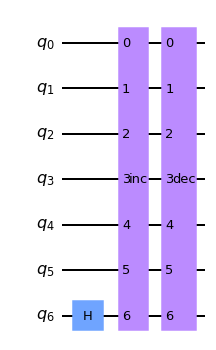

In [12]:
qc.draw('mpl')

In [13]:

Initial_state = str(input("Initial state? (Type 0/1/i): ")).lower()
def generate_walk(n,times,Initial_state):
    qc=QuantumCircuit(n,n)
    if Initial_state=='1':# down state
        qc.x(1)
        
    elif Initial_state=='0': # up state
        qc.x(1)
        qc.x(n-1)
        
    else:  #balanced state
        qc.x(1)
        
        qc.h(n-1)
        qc.s(n-1)
    for i in range(times):
        qc.append(qrw(n),range(n))
        
    qc.measure(range(n),range(n))
    return qc


    

Initial state? (Type 0/1/i): 1


In [14]:
n=7
times=60


In [15]:
qc=generate_walk(n,times,Initial_state)

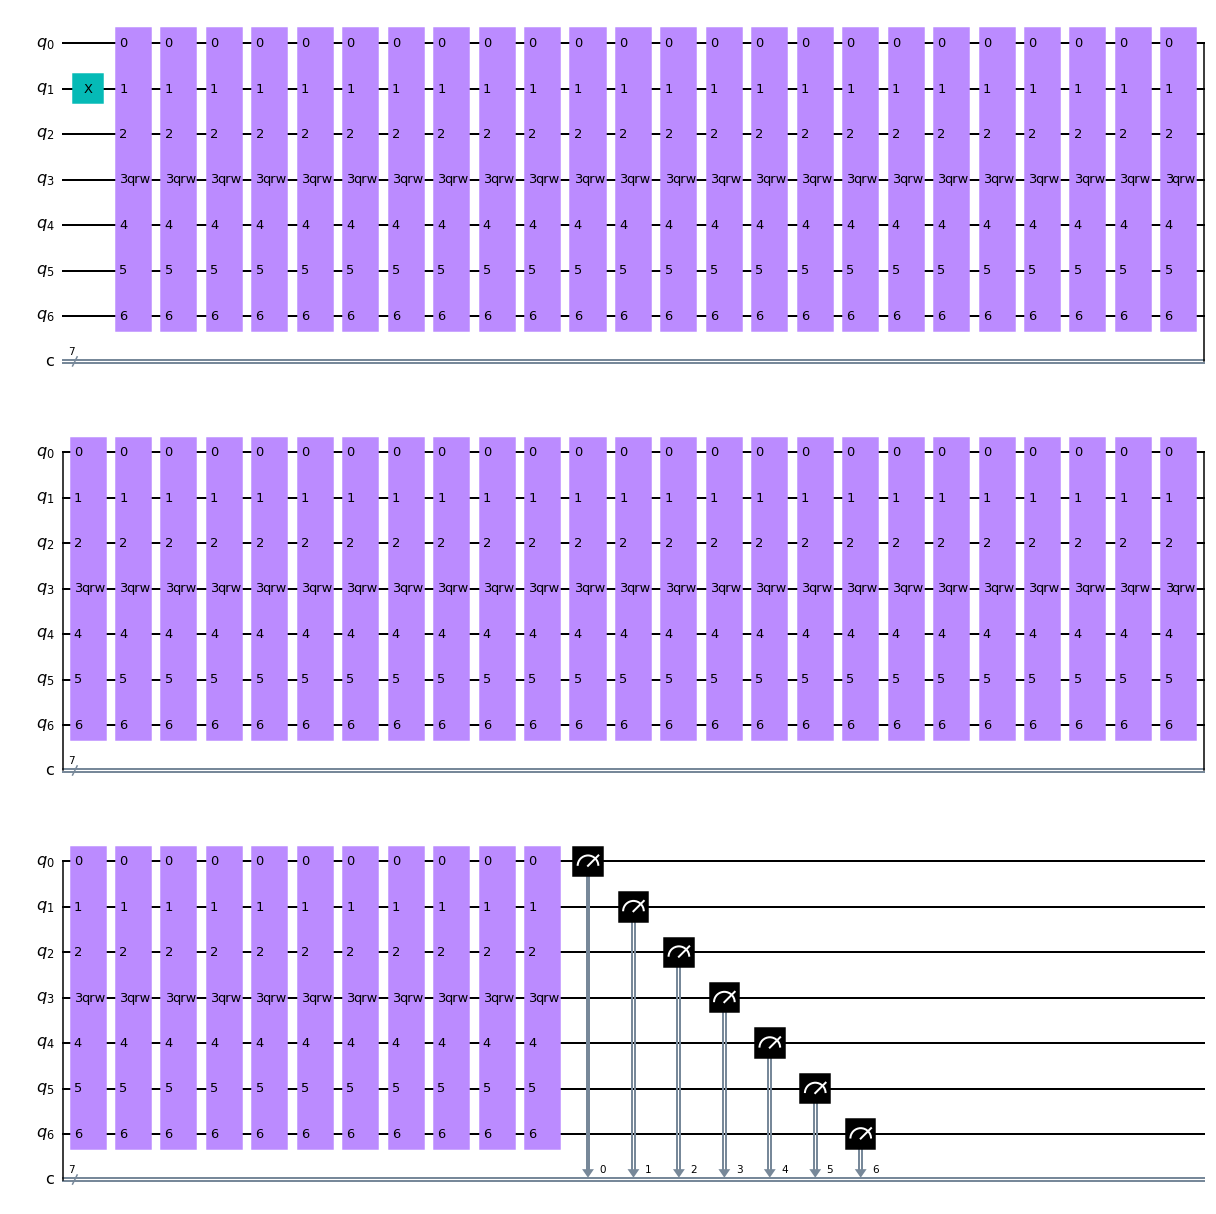

In [16]:
qc.draw('mpl')

In [17]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend,shots=5000).result()
counts=result.get_counts(qc)

print(counts)
sortedcounts = []
sortedkeys = sorted(counts)
for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))



{'0010111': 281, '1001101': 20, '0001011': 375, '1000001': 74, '0000111': 878, '0010110': 76, '1001011': 9, '0001101': 306, '1010101': 10, '0011001': 51, '0000001': 1, '1000111': 281, '1011111': 51, '0001111': 239, '0000100': 45, '1000010': 29, '0011011': 201, '1001100': 31, '0001110': 62, '0000011': 278, '1010010': 19, '0010101': 101, '1011001': 297, '1011101': 59, '1000100': 11, '0000010': 23, '0000110': 77, '1000000': 41, '0001001': 133, '0001010': 37, '0011100': 17, '1000011': 63, '0000101': 112, '1010011': 31, '1011000': 2, '0010100': 35, '1001010': 16, '0001100': 31, '1001110': 21, '0010011': 137, '1011110': 38, '1010000': 22, '1011100': 25, '1010111': 53, '0011010': 45, '0001000': 30, '0010001': 12, '1001001': 61, '1010001': 11, '0010010': 13, '1010110': 4, '1011010': 6, '0010000': 15, '1010100': 9, '0011000': 37, '1001000': 2, '0011110': 39, '0011111': 2, '0011101': 5, '1001111': 8, '1011011': 2}


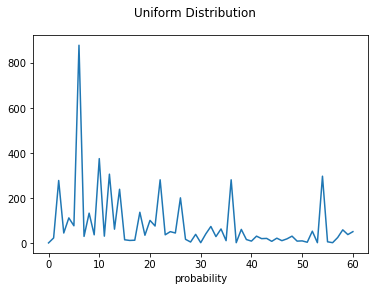

In [18]:
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))
plt.suptitle('Uniform Distribution')
plt.xlabel("probability")
plt.plot(sortedcounts)
plt.show()
            

In [19]:
simulator=Aer.get_backend('statevector_simulator')
result=execute(qc,backend=simulator).result()
sv=result.get_statevector()

## Plotting Histogram

### On classical computer

In [20]:
simulator=Aer.get_backend('qasm_simulator')

In [21]:
result=execute(qc,backend=simulator).result()

In [22]:
counts=result.get_counts(qc)

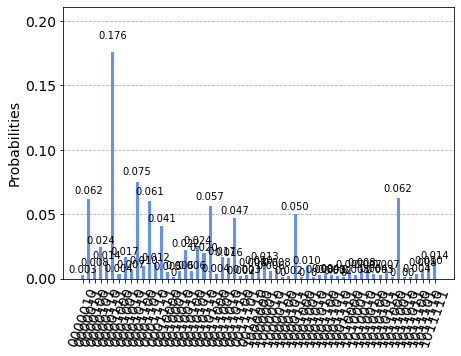

In [23]:
plot_histogram(result.get_counts(qc))

### On real device


In [24]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
provider=IBMQ.get_provider('ibm-q')

In [26]:
qcomp= provider.get_backend('ibmq_qasm_simulator')

In [27]:
job=execute(qc,backend=qcomp)

In [28]:
from qiskit.tools.monitor import job_monitor

In [29]:
job_monitor(job)

Job Status: job has successfully run


In [30]:
result=job.result()

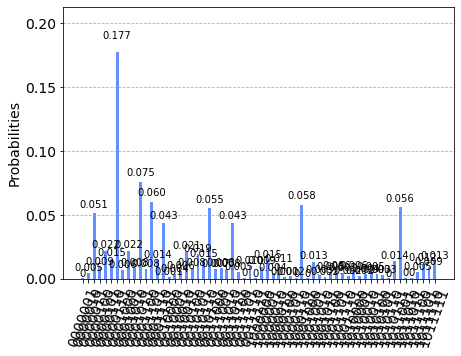

In [31]:
plot_histogram(result.get_counts(qc))

## State city Plot

### for n=4 qubits, times=10

In [32]:
def generate_walk(n,times):
    qc=QuantumCircuit(n,n)
    for i in range(times):
        qc.append(qrw(n),range(n))
        
    
    return qc



In [41]:
qc_AB= generate_walk(4,10)

In [42]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [43]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

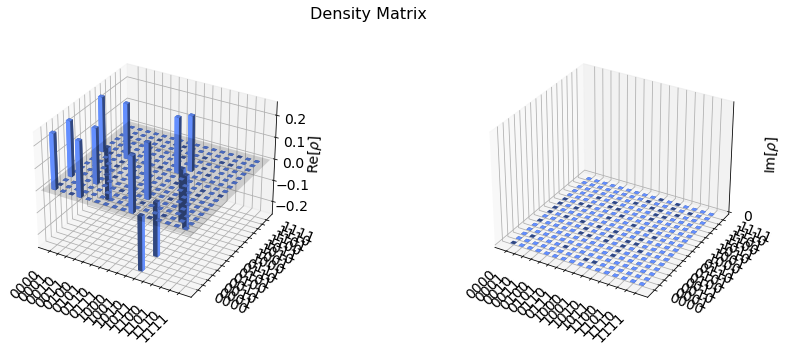

In [44]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')